### Notebook Used in the videos 5-8 of Basic NFL Data Analysis

This is the notebook I used for Part 2 of our analysis for NFL games.

You can find the YouTube Playlist here: 
https://www.youtube.com/playlist?list=PL_-HPWaG402fdW20pGzeZz9HObjsA-OpJ

Ram Narasimhan

Questions? Twitter: @ramnarasimhan

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
base = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_"
year = 2018
coda = ".csv"
url = base + str(year) + coda

# All the Part 1 steps in one cell

In [70]:
df = pd.read_csv(url)

# There are some columns that we don't want. Let's drop those
drop_columns = ['type', 'state_of_game', 'game_url']

# axis = 1 is to tell Pandas to drop the columns.
# inplace = True drops them permanently
df.drop(columns=drop_columns, axis=1, inplace=True)

# We create two new columns in the data frame and store it. 
# This column can take negative values (if the home team lost) or positive values (if the home team won)
df['home_adv_score'] = df['home_score'] - df['away_score']

#THe following line creates a new column, with True/False values for whether the home team won
df['home_win'] = df['home_adv_score'] >= 0 
df['away_win'] = df['home_adv_score'] < 0 

In [71]:
df

,game_id,home_team,away_team,week,season,home_score,away_score,home_adv_score,home_win,away_win
0,2018090600,PHI,ATL,1,2018,18,12,6,True,False
1,2018090900,BAL,BUF,1,2018,47,3,44,True,False
2,2018090907,NYG,JAX,1,2018,15,20,-5,False,True
3,2018090906,NO,TB,1,2018,40,48,-8,False,True
4,2018090905,NE,HOU,1,2018,27,20,7,True,False
5,2018090904,MIN,SF,1,2018,24,16,8,True,False
6,2018090903,MIA,TEN,1,2018,27,20,7,True,False
7,2018090902,IND,CIN,1,2018,23,34,-11,False,True
8,2018090901,CLE,PIT,1,2018,21,21,0,True,False
9,2018090908,LAC,KC,1,2018,28,38,-10,False,True


# Goal: Calculate the Win-Loss score for the whole year for each team

Logic:
1.     Pick each time, one by one.
1.    Filter their home games. Calc the win-loss Home loss = (total home games - home win)
1.   Filter their Away games. Do the same.

In [29]:
team_list = df['home_team'].unique()

In [32]:
hm_games = []
hm_wins = []
hm_losses = []

team_condition = df['home_team']=='PIT'
df_team_home_games = df[team_condition]
num_home_games = len(df_team_home_games)
num_home_wins = df_team_home_games['home_win'].sum()
num_home_losses = num_home_games - num_home_wins

hm_games.append(num_home_games)
hm_wins.append(num_home_wins)
hm_losses.append(num_home_losses)


In [33]:
hm_games = []
hm_wins = []
hm_losses = []

for team in team_list:
    team_condition = df['home_team']== team
    df_team_home_games = df[team_condition]
    num_home_games = len(df_team_home_games)
    num_home_wins = df_team_home_games['home_win'].sum()
    num_home_losses = num_home_games - num_home_wins

    hm_games.append(num_home_games)
    hm_wins.append(num_home_wins)
    hm_losses.append(num_home_losses)


In [34]:
pd.DataFrame({'Team': team_list, 'HG': hm_games, 'HW': hm_wins, 'HL': hm_losses})

,Team,HG,HW,HL
0,PHI,8,5,3
1,BAL,8,6,2
2,NYG,8,2,6
3,NO,8,6,2
4,NE,8,8,0
5,MIN,8,5,3
6,MIA,8,6,2
7,IND,8,6,2
8,CLE,8,5,3
9,LAC,8,5,3


# Try Using GroupBy

In [72]:
def calculate_num_losses(g):
    return g.count()-g.sum()

df.groupby('home_team')['home_win'].agg(hp = len, hw= sum, hl = loss)
df.groupby('away_team')['away_win'].agg(ap = len, aw= sum, al = loss)

,ap,aw,al
away_team,,,
ARI,8,2.0,6
ATL,8,3.0,5
BAL,8,4.0,4
BUF,8,2.0,6
CAR,8,2.0,6
CHI,8,5.0,3
CIN,8,2.0,6
CLE,8,2.0,6
DAL,8,3.0,5


In [76]:
home_results = df.groupby('home_team')['home_win'].agg(hp = len, hw= sum, hl = loss)
away_results = df.groupby('away_team')['away_win'].agg(ap = len, aw= sum, al = loss)

In [79]:
team_results = pd.merge(home_results, away_results, left_index=True, right_index=True)

In [82]:
team_results.rename_axis('Team', inplace=True)

In [84]:
team_results['hw']+team_results['aw']

Team
ARI     3.0
ATL     7.0
BAL    10.0
BUF     6.0
CAR     7.0
CHI    12.0
CIN     6.0
CLE     8.0
DAL    10.0
DEN     6.0
DET     6.0
GB      7.0
HOU    11.0
IND    10.0
JAX     5.0
KC     12.0
LA     13.0
LAC    12.0
MIA     7.0
MIN     8.0
NE     11.0
NO     13.0
NYG     5.0
NYJ     4.0
OAK     4.0
PHI     9.0
PIT     9.0
SEA    10.0
SF      4.0
TB      5.0
TEN     9.0
WAS     7.0
dtype: float64

In [75]:
team_rows = df['away_team'] == 'NE'
df[team_rows]

,game_id,home_team,away_team,week,season,home_score,away_score,home_adv_score,home_win,away_win
28,2018091612,JAX,NE,2,2018,31,20,11,True,False
46,2018092313,DET,NE,3,2018,26,10,16,True,False
98,2018102102,CHI,NE,7,2018,31,38,-7,False,True
120,2018102900,BUF,NE,8,2018,6,25,-19,False,True
139,2018111108,TEN,NE,10,2018,34,10,24,True,False
169,2018112505,NYJ,NE,12,2018,13,27,-14,False,True
196,2018120906,MIA,NE,14,2018,34,33,1,True,False
221,2018121610,PIT,NE,15,2018,17,10,7,True,False


In [19]:
pd.DataFrame({'A': [1,3], 'B': [3,3]})

,A,B
0,1,3
1,3,3


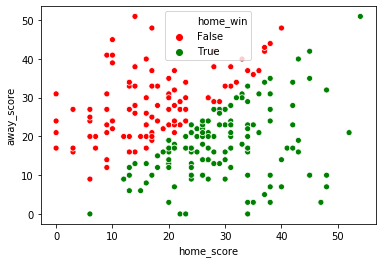

In [38]:
color_d = {True: 'green', False: 'red'}
sns.scatterplot(data=df, x='home_score', y='away_score', hue='home_win', palette = color_d)

In [31]:
df['home_win'].sum()/len(df) * 100

59.765625

So the Home Teams win 60% of the games. Is this typical? Try this for other years.

End of Part 1 of our Basic Data Analysis